# League Of Legends - EDA

<img src="https://onovia.com/wp-content/uploads/2020/05/lol-logo-rendered-hi-res.png"/>

## Contexto

### **O QUE É LEAGUE OF LEGENDS?**
<br>

League of Legends é um jogo de estratégia em que duas equipes de cinco Campeões se enfrentam para destruir a base uma da outra. Escolha entre mais de 140 Campeões para realizar jogadas épicas, assegurar abates e destruir torres conforme você luta até a vitória.
<br>

A vitória é dada ao time que eliminar todas as torres de um caminho(referido muitas vezes como lane), o inibidor daquela lane e a **base** do time inimigo, chamada normalmente de NEXUS. 


### **O QUE É ESSE DATASET?**
<br>

Como a maioria dos jogos competitivos, o LoL tem um sistema de ranqueamento de partidas para jogadores que jogam sozinhos e também para equipes. Esse ranqueamento é dado por tiers e divisions. Existem 9 tiers - Ferro, Bronze, Prata, Ouro, Platina, Diamante, Mestre, Grão-Mestre e Desafiante. Até o tier Mestre (e não contando ele), os tiers também são divididos em divisões - da IV (a mais baixa) a I (a mais alta). Após jogar e ganhar o suficiente, além de passar por uma "melhor de 5", os jogadores vão para o próximo tier.
<br>

Esse Dataset contém informações de mais de 54mil partidas retiradas do Diamante I até o Desafiante, ou seja, dos jogadores de mais alto nível do servidor brasileiro, retiradas utilizando a API da própria Riot Games e um wrapper chamado RiotWatcher. Como partidas do LoL duram entre 25-40min mais ou menos, eu procurei obter e condensar informações que eu considero relevantes - de acordo com o meu conhecimento sobre o game - de cada partida até exatamente os 10min de jogo, além do resultado final de dada partida.
<br>


### **QUAL O OBJETIVO?**
<br>

A pergunta guia é: dada as informações tiradas até os 10min de jogo, é possível prever o time vencedor? Além disso, podemos tirar informações novas sobre o jogo através da exploração do dataset? Eu criei esse dataset com a intenção apenas de explorar a possibilidade de predição e, por causa disso, ele não possui todas as informações possíveis para uma análise dos ranks mais altos completa. No entanto, ele ainda tem muito conteúdo!
<br>

### **DICIONÁRIO DE VARIÁVEIS**
<br>

Para quase todas as variáveis, existe uma versão "do outro time" dela. As únicas excessões são a 'gameID' (o identificador da partida) e a 'isWinner_blue' - visto que se o time azul ganha, o vermelho perde e vice-versa.
<br>

totalGold_ = Ouro total do time até os 10min de jogo. <br>
xp_ = XP total do time até os 10min de jogo. <br>
nKills_ = Número de eliminações total do time até os 10min de jogo. <br>
nDeaths_ = Número de mortes do time até os 10min de jogo. <br>
nAssists_ = Número de assistências do time até os 10min de jogo. <br>
minionsKilled_ = Número de minions farmados somados do time até os 10min de jogo. <br>
jungleMinionsKilled_ = Número de minions da Jungle farmados somados do time até os 10min de jogo.<br>
wardsPlaced_ = Wards colocadas no total do time até os 10min de jogo. <br>
wardsKilled_ = Wards eliminadas no total do time até os 10min de jogo. <br>
firstBlood_ = O time realizou o First Blood? <br>
firstTower_ = O time realizou o First Brick? <br>
**TEAMX**TowersDestroyed_ = Quantas torres da posição X foram levadas até os 10min pela equipe <br>
inhibitorsDestroyed_ = Quantas inibidores foram levados até os 10min pela equipe <br>
**TEAMX**DragonsDestroyed_ = Quantos dragões do tipo X foram eliminados até os 10min pela equipe<br>
riftHeraldDestroyed_ = Quantos Rift Heralds foram eliminados até os 10min pela equipe <br>
'TOP_', 'JUNGLE_', 'MIDDLE_', 'BOTTOM_', 'UTILITY_' = Referem-se ao campeão escolhido pelo jogador para jogar na dada posição. 
<br>

### **RESUMO DAS INFORMAÇÕES DESCOBERTAS**
<br>

* As distribuições de minions farmados, número de kills e assistis e gold e XP recebido são Normais.
* Não há distinção expressiva entre os lados do mapa quando visualizamos os dados dos times.
* Uma minoria de campeões tem presença bem maior nas partidas que os outros concorrentes de lane (Kai'Sa é 10x mais jogada que a Jinx, por exemplo).
* O maior winrate da amostra pertence ao Karthus, com 54,25%. O pior é o da Lilia, com 45,44%.
* Udyr é o jungler com o maior farm médio aos 10min de jogo no nosso dataset.
* Times que tem mais farm, gold e xp aos 10min tem maior chance de ganhar.
* A torre mais destruída do jogo considerando apenas os 10min de cada partida é a torre do top.
* Times que fazem o primeiro dragão estão mais propensos a ganhar, chegando a 66% de winrate para os times que fazem o dragão d'água.
* Quanto mais Wards Eliminadas e Wards Colocadas por um time, maior a probabilidade daquele time ter ganhado

### Importação das Libs Utilizadas

In [1]:
# Importando Libs
import jovian

# Manipulação e Limpeza de Dados
import numpy as np
import pandas as pd

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Estatística
from scipy import stats

# Funções Helpers
from helper import get_champions_name, xp_to_level

sns.set_theme(style="white")
plt.rc("axes.spines", top=False, right=False)
sns.set_context('talk')
pd.set_option('display.max_columns', None)

In [ ]:
jovian.commit(files = ['helper.py', 'Extração de Dados da API.ipynb'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


## Análise Exploratória Inicial

In [3]:
# Load no Dataset

raw_df = pd.read_csv('data/54k_matches.csv')
raw_df = raw_df.drop('Unnamed: 0', axis=1)

In [4]:
raw_df

gameID  isWinner_blue  totalGold_red  xp_red  nKills_red  \
0      2209059589           True          17214   17604           8   
1      2209068903          False          17716   17651           9   
2      2209108244           True          16943   19396           5   
3      2209077995          False          17221   18862          10   
4      2209117048           True          16109   19354           7   
...           ...            ...            ...     ...         ...   
54133  2176919357          False          16440   17495           7   
54134  2176879019          False          18691   19151           9   
54135  2175441438          False          17306   19096           7   
54136  2175286147          False          19199   19407          10   
54137  2175072176          False          17155   19246           5   

       nDeaths_red  nAssists_red  minionsKilled_red  jungleMinionsKilled_red  \
0                7             6                204                       59   
1               10            12                194                       50   
2                3             6                238                       65   
3                6             6                207                       64   
4                9             2                197                       69   
...            ...           ...                ...                      ...   
54133            2             7                234                       48   
54134            4             9                230                       52   
54135            9             5                253                       68   
54136            6            10                223                       58   
54137            4             2                238                       77   

       wardsPlaced_red  wardsKilled_red  firstBlood_red  firstTower_red  \
0                   17                3               1               0   
1                   17                1               0               0   
2                   17                2               1               0   
3                   18                3               0               0   
4                   14                1               0               0   
...                ...              ...             ...             ...   
54133               13                4               0               0   
54134               17                1               1               0   
54135               12                2               1               0   
54136               19                3               0               0   
54137               18                4               1               0   

       midTowersDestroyed_red  botTowersDestroyed_red  topTowersDestroyed_red  \
0                           0                       0                       0   
1                           0                       0                       0   
2                           0                       0                       0   
3                           0                       0                       0   
4                           0                       0                       0   
...                       ...                     ...                     ...   
54133                       0                       0                       0   
54134                       0                       0                       0   
54135                       0                       0                       0   
54136                       0                       0                       0   
54137                       0                       0                       0   

       inhibitorsDestroyed_red  fireDragonsDestroyed_red  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                      

In [5]:
raw_df.columns

Index(['gameID', 'isWinner_blue', 'totalGold_red', 'xp_red', 'nKills_red',
       'nDeaths_red', 'nAssists_red', 'minionsKilled_red',
       'jungleMinionsKilled_red', 'wardsPlaced_red', 'wardsKilled_red',
       'firstBlood_red', 'firstTower_red', 'midTowersDestroyed_red',
       'botTowersDestroyed_red', 'topTowersDestroyed_red',
       'inhibitorsDestroyed_red', 'fireDragonsDestroyed_red',
       'airDragonsDestroyed_red', 'waterDragonsDestroyed_red',
       'earthDragonsDestroyed_red', 'riftHeraldDestroyed_red', 'TOP_red',
       'JUNGLE_red', 'MIDDLE_red', 'BOTTOM_red', 'UTILITY_red',
       'totalGold_blue', 'xp_blue', 'nKills_blue', 'nDeaths_blue',
       'nAssists_blue', 'minionsKilled_blue', 'jungleMinionsKilled_blue',
       'wardsPlaced_blue', 'wardsKilled_blue', 'firstBlood_blue',
       'firstTower_blue', 'midTowersDestroyed_blue', 'botTowersDestroyed_blue',
       'topTowersDestroyed_blue', 'inhibitorsDestroyed_blue',
       'fireDragonsDestroyed_blue', 'airDragonsDestroy

In [6]:
print(f"Número de Observações: {raw_df.shape[0]}\nNúmero de Variáveis: {raw_df.shape[1]}")

Número de Observações: 54138
Número de Variáveis: 52


In [7]:
# Vamos dar uma olhadinha nos dtypes

raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54138 entries, 0 to 54137
Data columns (total 52 columns):
gameID                        54138 non-null int64
isWinner_blue                 54138 non-null bool
totalGold_red                 54138 non-null int64
xp_red                        54138 non-null int64
nKills_red                    54138 non-null int64
nDeaths_red                   54138 non-null int64
nAssists_red                  54138 non-null int64
minionsKilled_red             54138 non-null int64
jungleMinionsKilled_red       54138 non-null int64
wardsPlaced_red               54138 non-null int64
wardsKilled_red               54138 non-null int64
firstBlood_red                54138 non-null int64
firstTower_red                54138 non-null int64
midTowersDestroyed_red        54138 non-null int64
botTowersDestroyed_red        54138 non-null int64
topTowersDestroyed_red        54138 non-null int64
inhibitorsDestroyed_red       54138 non-null int64
fireDragonsDestroyed_red 

In [8]:
# Checando por rows duplicadas

raw_df[raw_df.duplicated()]

Empty DataFrame
Columns: [gameID, isWinner_blue, totalGold_red, xp_red, nKills_red, nDeaths_red, nAssists_red, minionsKilled_red, jungleMinionsKilled_red, wardsPlaced_red, wardsKilled_red, firstBlood_red, firstTower_red, midTowersDestroyed_red, botTowersDestroyed_red, topTowersDestroyed_red, inhibitorsDestroyed_red, fireDragonsDestroyed_red, airDragonsDestroyed_red, waterDragonsDestroyed_red, earthDragonsDestroyed_red, riftHeraldDestroyed_red, TOP_red, JUNGLE_red, MIDDLE_red, BOTTOM_red, UTILITY_red, totalGold_blue, xp_blue, nKills_blue, nDeaths_blue, nAssists_blue, minionsKilled_blue, jungleMinionsKilled_blue, wardsPlaced_blue, wardsKilled_blue, firstBlood_blue, firstTower_blue, midTowersDestroyed_blue, botTowersDestroyed_blue, topTowersDestroyed_blue, inhibitorsDestroyed_blue, fireDragonsDestroyed_blue, airDragonsDestroyed_blue, waterDragonsDestroyed_blue, earthDragonsDestroyed_blue, riftHeraldDestroyed_blue, TOP_blue, JUNGLE_blue, MIDDLE_blue, BOTTOM_blue, UTILITY_blue]
Index: []

In [9]:
raw_df[raw_df.isna().any(axis=1)]

Empty DataFrame
Columns: [gameID, isWinner_blue, totalGold_red, xp_red, nKills_red, nDeaths_red, nAssists_red, minionsKilled_red, jungleMinionsKilled_red, wardsPlaced_red, wardsKilled_red, firstBlood_red, firstTower_red, midTowersDestroyed_red, botTowersDestroyed_red, topTowersDestroyed_red, inhibitorsDestroyed_red, fireDragonsDestroyed_red, airDragonsDestroyed_red, waterDragonsDestroyed_red, earthDragonsDestroyed_red, riftHeraldDestroyed_red, TOP_red, JUNGLE_red, MIDDLE_red, BOTTOM_red, UTILITY_red, totalGold_blue, xp_blue, nKills_blue, nDeaths_blue, nAssists_blue, minionsKilled_blue, jungleMinionsKilled_blue, wardsPlaced_blue, wardsKilled_blue, firstBlood_blue, firstTower_blue, midTowersDestroyed_blue, botTowersDestroyed_blue, topTowersDestroyed_blue, inhibitorsDestroyed_blue, fireDragonsDestroyed_blue, airDragonsDestroyed_blue, waterDragonsDestroyed_blue, earthDragonsDestroyed_blue, riftHeraldDestroyed_blue, TOP_blue, JUNGLE_blue, MIDDLE_blue, BOTTOM_blue, UTILITY_blue]
Index: []

Como fui o responsável pela extração e criação das features do dataset, eu já esperava a ausência de valores NaN e de rows duplicadas. Algumas features, como o champion escolhido por role, first blood e etc., vão ser mais **úteis caso transformadas em categorias**. 

Como utilizarei o **CatBoost** para fazer as previsões, isso não se tornará um problema para o modelo. No entanto, para ferramentas de plot e de análise do pandas, como o describe, a transformação facilitará o exame das variáveis.

In [10]:
cat_vars = ['TOP_blue', 'UTILITY_blue', 'MIDDLE_blue', 'JUNGLE_blue', 'BOTTOM_blue',
            'firstBlood_blue', 'firstTower_blue', 'isWinner_blue','TOP_red', 'UTILITY_red',
            'MIDDLE_red', 'JUNGLE_red', 'BOTTOM_red', 'firstBlood_red', 'firstTower_red', 'gameID']

for var in cat_vars:
    raw_df[var] = raw_df[var].astype('category')
    
raw_df.describe()

totalGold_red        xp_red    nKills_red   nDeaths_red  nAssists_red  \
count   54138.000000  54138.000000  54138.000000  54138.000000  54138.000000   
mean    16694.073941  18010.943829      6.528390      6.505486      6.844453   
std      1511.225544   1181.155002      3.017221      3.020525      4.054665   
min      9949.000000   8425.000000      0.000000      0.000000      0.000000   
25%     15646.000000  17280.000000      4.000000      4.000000      4.000000   
50%     16593.000000  18048.000000      6.000000      6.000000      6.000000   
75%     17633.000000  18794.000000      8.000000      8.000000      9.000000   
max     24057.000000  22825.000000     23.000000     25.000000     32.000000   

       minionsKilled_red  jungleMinionsKilled_red  wardsPlaced_red  \
count       54138.000000             54138.000000     54138.000000   
mean          214.806181                55.948151        15.282242   
std            21.683407                10.187845         2.686058   
min            57.000000                 0.000000         4.000000   
25%           201.000000                48.000000        14.000000   
50%           216.000000                56.000000        15.000000   
75%           230.000000                63.000000        17.000000   
max           292.000000               103.000000        32.000000   

       wardsKilled_red  midTowersDestroyed_red  botTowersDestroyed_red  \
count     54138.000000            54138.000000            54138.000000   
mean          2.737966                0.007980                0.008423   
std           1.670963                0.126225                0.094569   
min           0.000000                0.000000                0.000000   
25%           2.000000                0.000000                0.000000   
50%           3.000000                0.000000                0.000000   
75%           4.000000                0.000000                0.000000   
max          11.000000                5.000000                3.000000   

       topTowersDestroyed_red  inhibitorsDestroyed_red  \
count            54138.000000             54138.000000   
mean                 0.021297                 0.000517   
std                  0.148413                 0.022736   
min                  0.000000                 0.000000   
25%                  0.000000                 0.000000   
50%                  0.000000                 0.000000   
75%                  0.000000                 0.000000   
max                  2.000000                 1.000000   

       fireDragonsDestroyed_red  airDragonsDestroyed_red  \
count              54138.000000             54138.000000   
mean                   0.105379                 0.095090   
std                    0.307044                 0.293342   
min                    0.000000                 0.000000   
25%                    0.000000                 0.000000   
50%                    0.000000                 0.000000   
75%                    0.000000                 0.000000   
max                    1.000000                 1.000000   

       waterDragonsDestroyed_red  earthDragonsDestroyed_red  \
count               54138.000000               54138.000000   
mean                    0.098323                   0.096827   
std                     0.297753                   0.295724   
min                     0.000000                   0.000000   
25%                     0.000000                   0.000000   
50%                     0.000000                   0.000000   
75%                     0.000000                   0.000000   
max                     1.000000                   1.000000   

       riftHeraldDestroyed_red  totalGold_blue       xp_blue   nKills_blue  \
count             54138.000000    54138.000000  54138.000000  54138.000000   
mean                  0.211386    16713.320717  18074.249307      6.505486   
std                   0.408295     1509.906297   1181.518726      3.020525   
min                   0.000000     8792.0000

In [11]:
raw_df[cat_vars].describe()

TOP_blue  UTILITY_blue  MIDDLE_blue  JUNGLE_blue  BOTTOM_blue  \
count      54138         54138        54138        54138        54138   
unique       149           138          150          148          148   
top          164           412          236          120          145   
freq        4635          5403         3119         3863         9076   

        firstBlood_blue  firstTower_blue isWinner_blue  TOP_red  UTILITY_red  \
count             54138            54138         54138    54138        54138   
unique                2                2             2      148          137   
top                   0                0          True      150          412   
freq              27575            52525         27738     4762         5670   

        MIDDLE_red  JUNGLE_red  BOTTOM_red  firstBlood_red  firstTower_red  \
count        54138       54138       54138           54138           54138   
unique         149         150         146               2               2   
top            236         120         145               1               0   
freq          3064        3987        9880           27571           52319   

            gameID  
count        54138  
unique       54120  
top     2208122894  
freq             2

Observando o describe de ambas os dtypes, já podemos tirar algumas informações interessantes. Mesmo que seja pelo id do champion, é possível ver qual foi o mais utilizado em cada lane (e podemos ver que o champion usado em todas as lanes, com exceção do TOP,  é o mesmo independente do lado do mapa). Além disso, nas **estatísticas dos valores contínuos, também observamos valores parecidos entre ambos os times**.

Considerando que a amostra tem 54 mil partidas apenas das divisões mais altas do jogo, podemos criar uma **hipótese com uma base forte de que o baleanceamento entre lados do mapa é equilibrado**, mas que existem sim alguns campeões considerados mais fortes do que outros. Ainda assim, considerando que existem **154 campeões no jogo atualmente, o meta parece bem diversificado em picks únicos**.

No entanto, houve uma coisa que me chamou ainda mais atenção: 54120 gameIDs únicos e 54138 no total, sendo que eles são a PrimaryKey de cada partida: alguma coisa deu errado. Vamos verificar.

In [12]:
raw_df[raw_df['gameID'].duplicated(keep = False)].sort_values('gameID')

gameID isWinner_blue  totalGold_red  xp_red  nKills_red  \
5415   2182263291          True          17540   18851           6   
11799  2182263291          True          17540   18851           6   
7656   2182996951         False          18592   20040           9   
11622  2182996951         False          18592   20040           9   
7002   2188382582         False          18485   19587           9   
10746  2188382582         False          18485   19587           9   
8459   2190505625          True          16351   18456           4   
6332   2190505625          True          16351   18456           4   
12836  2193476717          True          16252   18090           6   
5844   2193476717          True          16252   18090           6   
14102  2194397746          True          16323   16863           6   
5879   2194397746          True          16323   16863           6   
12818  2197998913          True          14313   17545           2   
6237   2197998913          True          14313   17545           2   
7551   2199722717          True          16771   17791           4   
13189  2199722717          True          16771   17791           4   
5189   2200473799         False          22355   18787          18   
8501   2200473799         False          22355   18787          18   
9633   2203253414         False          16946   17896           7   
8135   2203253414         False          16946   17896           7   
9836   2204166329          True          16591   17455           5   
4364   2204166329          True          16591   17455           5   
8696   2205287869          True          15827   18419           3   
4433   2205287869          True          15827   18419           3   
12708  2205846970         False          18419   17962           9   
4356   2205846970         False          18419   17962           9   
5744   2206757287         False          18211   18749          12   
13476  2206757287         False          18211   18749          12   
8557   2207414586          True          17172   17464           8   
7464   2207414586          True          17172   17464           8   
8553   2208122894          True          16502   18330           6   
6434   2208122894          True          16502   18330           6   
9136   2208515597         False          18084   18434          11   
4506   2208515597         False          18084   18434          11   
9117   2210114649          True          14894   17285           4   
6373   2210114649          True          14894   17285           4   

       nDeaths_red  nAssists_red  minionsKilled_red  jungleMinionsKilled_red  \
5415             4             6                231                       64   
11799            4             6                231                       64   
7656             4            10                243                       72   
11622            4            10                243                       72   
7002             4             9                236                       53   
10746            4             9                236                       53   
8459             4             3                242                       68   
6332             4             3                242                       68   
12836            5             3                222                       56   
5844             5             3                222                       56   
14102           10             8                211                       67   
5879            10             8                211                       67   
12818            8             2                216                       56   
6237             8             2                216                       56   
7551             6             5                239                       56   
13189            6             5                239                       56   
5189             5            17                201         

Realmente as partidas são as mesmas e me parece ter havido um erro na função que define a role de cada champion. Irei apagar as rows com gameIDs duplicados. 

In [13]:
raw_df = raw_df.drop_duplicates(subset='gameID')

raw_df[raw_df['gameID'].duplicated(keep = False)].sort_values('gameID')

Empty DataFrame
Columns: [gameID, isWinner_blue, totalGold_red, xp_red, nKills_red, nDeaths_red, nAssists_red, minionsKilled_red, jungleMinionsKilled_red, wardsPlaced_red, wardsKilled_red, firstBlood_red, firstTower_red, midTowersDestroyed_red, botTowersDestroyed_red, topTowersDestroyed_red, inhibitorsDestroyed_red, fireDragonsDestroyed_red, airDragonsDestroyed_red, waterDragonsDestroyed_red, earthDragonsDestroyed_red, riftHeraldDestroyed_red, TOP_red, JUNGLE_red, MIDDLE_red, BOTTOM_red, UTILITY_red, totalGold_blue, xp_blue, nKills_blue, nDeaths_blue, nAssists_blue, minionsKilled_blue, jungleMinionsKilled_blue, wardsPlaced_blue, wardsKilled_blue, firstBlood_blue, firstTower_blue, midTowersDestroyed_blue, botTowersDestroyed_blue, topTowersDestroyed_blue, inhibitorsDestroyed_blue, fireDragonsDestroyed_blue, airDragonsDestroyed_blue, waterDragonsDestroyed_blue, earthDragonsDestroyed_blue, riftHeraldDestroyed_blue, TOP_blue, JUNGLE_blue, MIDDLE_blue, BOTTOM_blue, UTILITY_blue]
Index: []

In [14]:
print(f"Número de Observações: {raw_df.shape[0]}\nNúmero de Variáveis: {raw_df.shape[1]}")

Número de Observações: 54120
Número de Variáveis: 52


## DataViz

Considerando as 54 mil partidas da nossa amostra, a divisão que elas se passam e o tempo de partida que elas possuem (10min iniciais), gostaria de responder as seguintes perguntas:

* O lado do mapa influencia no resultado do jogo?
* Quais são os campeões mais comuns de cada role? É muito desbalanceado o número de picks desses campeões quando comparados com outros?
* Quais são os principais fatores que influenciam numa vitória?
* Qual é a torre que mais é destruída nas partidas?
* Qual é o dragão mais comum? Ou eles são divididos uniformemente?
* Visão realmente ganha o jogo? Ou em um nível alto, como é o desse dataset, todo mundo já utiliza wards desde o início?
* Visualização de categorias - KDAs, número de minions e etc.

### Lado do Mapa

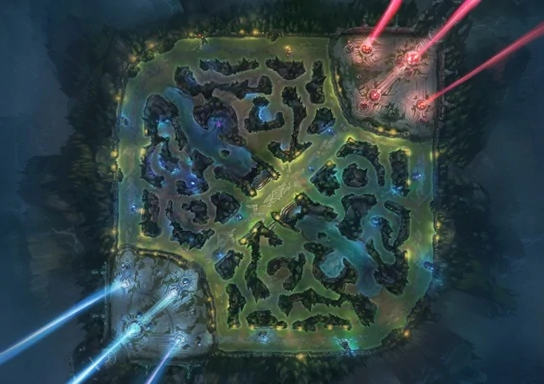

No League of Legends, cada time joga de um lado do mapa. Considerando o espelhamento dos monstros da selva, as principais diferenças entre os times é o fato de que o time azul fica mais próximo do Dragon e o time vermelho do Rift Herald/Baron e a ordem dos *picks* e *bans* durante a fase de escolha, antes da partida.
<br>

**Apesar dos lados serem considerados balanceados, o lado azul ganhou 63% das partidas do CBLOL 2020**, o campeonato brasileiro de League of Legends. Vamos olhar a nossa amostra e verificar se as filas não-profissionais tem esse mesmo comportamento:

True     27727
False    26393
Name: isWinner_blue, dtype: int64
True     0.512324
False    0.487676
Name: isWinner_blue, dtype: float64


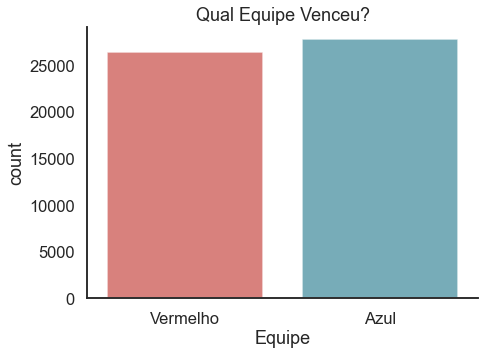

In [15]:
custom_palette = [sns.color_palette("Spectral")[0], sns.color_palette("Spectral")[-1]]

fig, ax = plt.subplots(figsize=(7,5))

sns.countplot(data=raw_df, x='isWinner_blue',
              palette=custom_palette, alpha=0.8)

ax.set(title='Qual Equipe Venceu?',
       xlabel='Equipe',
       xticklabels=['Vermelho', 'Azul'])

print(raw_df['isWinner_blue'].value_counts())
print(raw_df['isWinner_blue'].value_counts(normalize = True))

Apesar da existência de uma diferença entre os lados, **ela é bem pequena**. Ainda assim, dentro dessa amostra, temos mais vencedores no time azul que no vermelho. 
<br>

Vamos verificar a distribuição de alguns medidores de perfomance importante entre os times, como o XP ganho, o número de kills e de minions farmados:

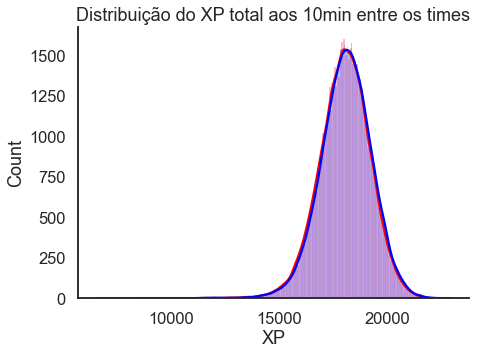

In [16]:
hist_kwargs = {'kde': True,
               'alpha': 0.3,
               'data': raw_df}

fig, ax = plt.subplots(figsize=(7,5))

for c in ['red', 'blue']:
    sns.histplot(x=f'xp_{c}', color=c,
                 ax=ax, **hist_kwargs)

ax.set(title='Distribuição do XP total aos 10min entre os times',
       xlabel='XP')
ax;

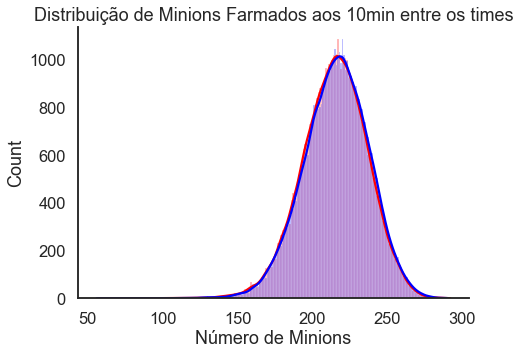

In [17]:
hist_kwargs['discrete'] = True

fig, ax = plt.subplots(figsize=(7,5))

for c in ['red', 'blue']:
    sns.histplot(x=f'minionsKilled_{c}', color=c,
                 ax=ax, **hist_kwargs)

ax.set(title='Distribuição de Minions Farmados aos 10min entre os times',
       xlabel='Número de Minions')

ax;

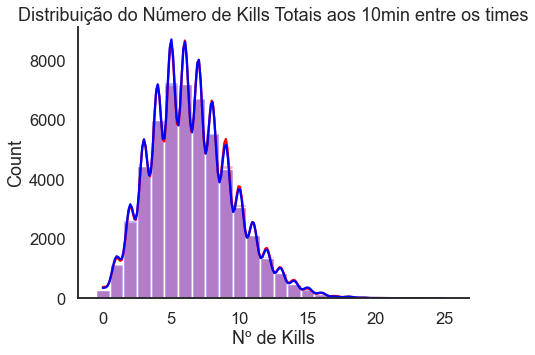

In [18]:
fig, ax = plt.subplots(figsize = (7,5))

for c in ['red', 'blue']:
    sns.histplot(x=f'nKills_{c}', color=c,
                 ax=ax, **hist_kwargs)

ax.set(title='Distribuição do Número de Kills Totais aos 10min entre os times',
       xlabel='Nº de Kills')

ax;

Comparando as distribuições entre os times, podemos ver que elas são **muito parecidas** e são **próximas de uma distribuição normal**.
<br>

Como são partidas realizadas por jogadores de nível mais alto, o número de kills médio é provavelmente menor do que a média de todos os jogadores, assim como o xp recebido e farm realizado são maiores.
<br>

Para checar se as distribuições são idênticas, irei utilizar o [teste Kolmogorov–Smirnov](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test) presente na biblioteca scipy. É válido notar que todas as variáveis mostradas acima são discretas mas, no caso da distribuição do XP aos 10min, o número de bins possíveis $≅$ número de amostras/2. 

$H_0: dist(xp\_red) = dist(xp\_blue)$<br>
$H_a: dist(xp\_red) ≠ dist(xp\_blue)$<br>
$α = 0.01$

In [19]:
alpha = 0.01

D_stat, p_value = stats.ks_2samp(raw_df['xp_red'], raw_df['xp_blue'])

print(f"p_value < alpha? {p_value < alpha}")

p_value < alpha? True


Como o p-value é menor que alpha, rejeitamos a hipótese nula e confirmamos que a distribuição do XP entre os times é *estatísticamente* diferente. 

$H_0: dist(minionsKilled\_red) = dist(minionsKilled\_blue)$<br>
$H_a: dist(minionsKilled\_red) ≠ dist(minionsKilled\_blue)$<br>
$α = 0.01$

In [20]:
D_stat, p_value = stats.ks_2samp(raw_df['minionsKilled_red'], raw_df['minionsKilled_blue'])

print(f"p_value < alpha? {p_value < alpha}")

p_value < alpha? True


Como o p-value é menor que alpha, rejeitamos a hipótese nula e confirmamos que a distribuição do XP entre os times é *estatísticamente* diferente. 
<br>

Como o número de kills se encaixa mais fortemente como uma variável discreta (devido ao número de bins), o teste não é válido para ele. 
<br>

É válido notar que apesar das variáveis não serem estatísticamente iguais, **isso não significa que elas não podem ser similares - o que foi comprovado pela visualização.**

### Champions
<br>

<img src="https://i.pinimg.com/736x/10/81/35/1081350f1fd5fbf0b3772488dcc0a9c7.jpg"/>

Para os próximos plots, precisarei aplicar uma função que transforma o ID dos champions no próprio nome do personagem, o que vai facilitar a análise.

In [21]:
# Aplicando um map para modificar o nome dos campeões
df_modified = raw_df.copy()

roles = ['UTILITY_red', 'MIDDLE_red', 'BOTTOM_red', 'JUNGLE_red', 'TOP_red', 
        'UTILITY_blue', 'MIDDLE_blue', 'BOTTOM_blue', 'JUNGLE_blue', 'TOP_blue']

for role in roles:
    df_modified['name_'+role] = df_modified.loc[:, role].apply(get_champions_name)

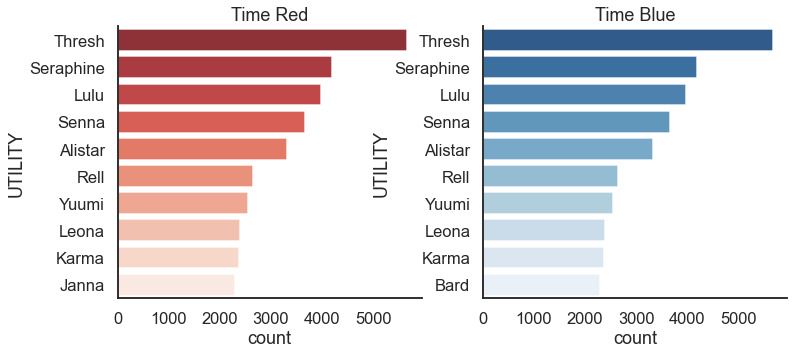

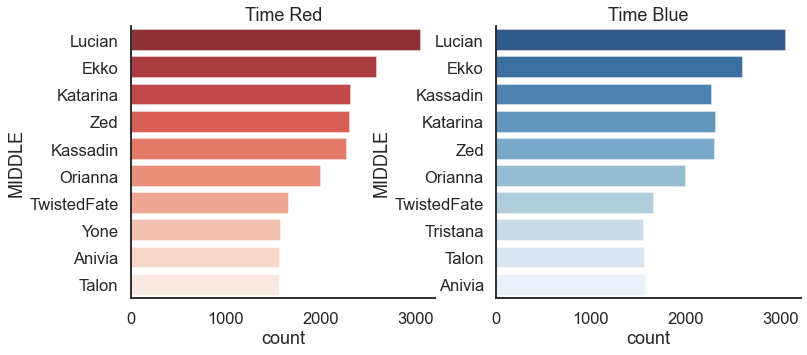

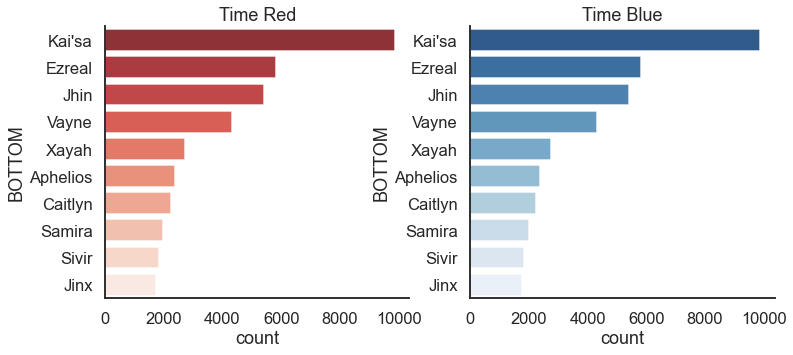

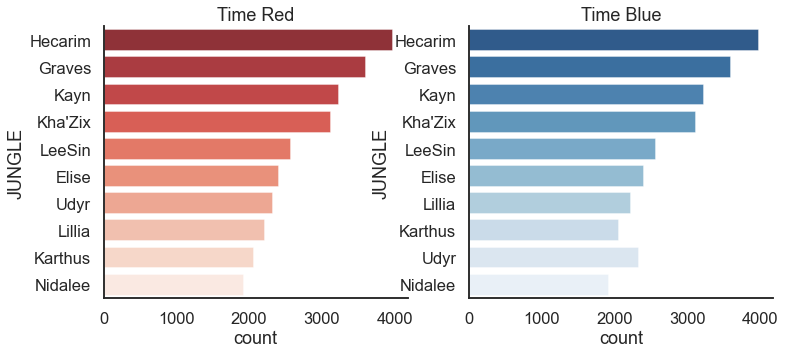

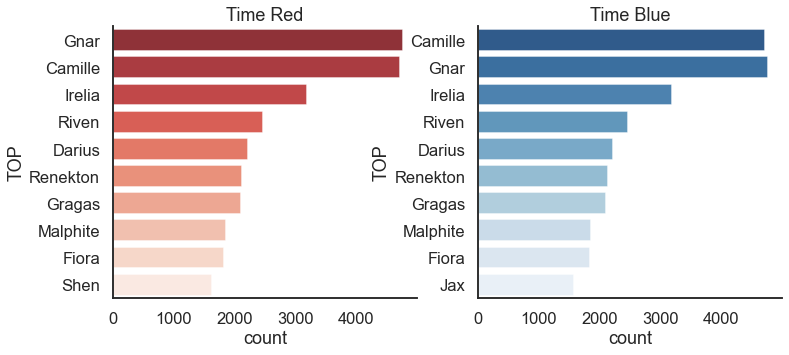

In [22]:
most_used_champions = []

for i in range(5):
    fig, axs = plt.subplots(1, 2, figsize=(12,5))
    
    for ax, j, palette in zip(axs, [0, 5], ['Reds_r', 'Blues_r']):
    
        # j = 0 / j = 5 pela diferença de posição
        
        order = df_modified['name_'+roles[i+j]].value_counts().nlargest(10).index
        
        most_used_champions.append(order.tolist())

        sns.countplot(data=df_modified, y='name_'+roles[i],
                      orient='h', alpha=0.9, order=order,
                      ax=ax, palette=palette).set_title(f'Time {palette[:-3]}')

        ax.set_ylabel(roles[i][:-4])

Os plots deixam claro que o **lado do mapa/cor do time não interferem na escolha do campeão**. São pouquíssimos os casos em que um campeão não está na mesma posição em ambos os times e quando isso acontece, ele está em uma posição adjacente.
<br>

Também fica clara a preferência por alguns campeões em relações à outros. **Considerando apenas o TOP 10, existem campeões 5x mais escolhidos que outros entre os ADCs**. Mas qual é o motivo desses campeões serem mais escolhidos? <br>
Acredito que a diversão ao jogar um campeão é um fator que conta mas, considerando o cenário do LoL, provavelmente esses campeões são os mais escolhidos porque estão dentro do *meta*.
<br>

Campeões dentro do meta são aqueles que dada as condições atuais das atualizações do jogo, estão mais fortes e/ou funcionam melhor que os outros, seja pelas habilidades que eles possuem e pelo seu estilo de jogo ou seja por terem tido seus atributos melhorados em alguma atualização (buff). Vamos verificar se os campeões mais escolhidos tem maior frequência de vitória:

In [23]:
# Transformar a lista c/ listas em flat
champion_list = [champion for role in most_used_champions for champion in role]

most_used_champions_wr = pd.DataFrame(columns=["Champion", "Winrate"])

for champion in set(champion_list):

    wins = 0
    loses = 0
    
    # Contar a quantidade Wins/Loses usando o value_counts e adicionar ao DataFrame
    for i in range(10):
        
        mask_champ = df_modified['name_'+roles[i]] == champion
        df_wl_count = df_modified[mask_champ]['isWinner_blue'].value_counts().sort_index()
        
        if i > 4:
            wins += df_wl_count.iloc[1]
            loses += df_wl_count.iloc[0]
            
        else:
            wins += df_wl_count.iloc[0]
            loses += df_wl_count.iloc[1]
        
    d = {"Champion":champion,
         "Winrate":wins/(wins+loses)}
    
    most_used_champions_wr = most_used_champions_wr.append(d, ignore_index=True)

In [24]:
most_used_champions_wr = most_used_champions_wr.sort_values('Winrate', ascending=False) \
                                               .reset_index(drop=True)
most_used_champions_wr

Champion   Winrate
0       Karthus  0.542542
1      Kassadin  0.537084
2         Talon  0.532311
3        Darius  0.530931
4          Rell  0.527838
5          Udyr  0.527289
6      Tristana  0.523951
7       Hecarim  0.522432
8        Thresh  0.522403
9          Bard  0.522023
10        Elise  0.520957
11        Riven  0.519877
12    Seraphine  0.519281
13     Malphite  0.517436
14       Anivia  0.516401
15       Kai'sa  0.516018
16        Vayne  0.514104
17     Katarina  0.511542
18        Janna  0.509226
19      Camille  0.508748
20  TwistedFate  0.508255
21         Gnar  0.507837
22         Jinx  0.505349
23        Sivir  0.504724
24         Lulu  0.504620
25         Kayn  0.502207
26      Kha'Zix  0.501654
27          Jax  0.501440
28       Gragas  0.498814
29        Fiora  0.498095
30     Renekton  0.497309
31         Ekko  0.496286
32        Leona  0.495718
33      Alistar  0.495679
34      Caitlyn  0.493707
35         Shen  0.493454
36         Jhin  0.493414
37       LeeSin  0.491363
38        Karma  0.489672
39        Yuumi  0.489469
40        Senna  0.487210
41       Lucian  0.483641
42         Yone  0.483290
43       Samira  0.480399
44          Zed  0.479886
45      Orianna  0.478412
46      Nidalee  0.477763
47       Ezreal  0.476959
48        Xayah  0.474669
49       Graves  0.469340
50     Aphelios  0.467156
51       Irelia  0.455423
52       Lillia  0.454428

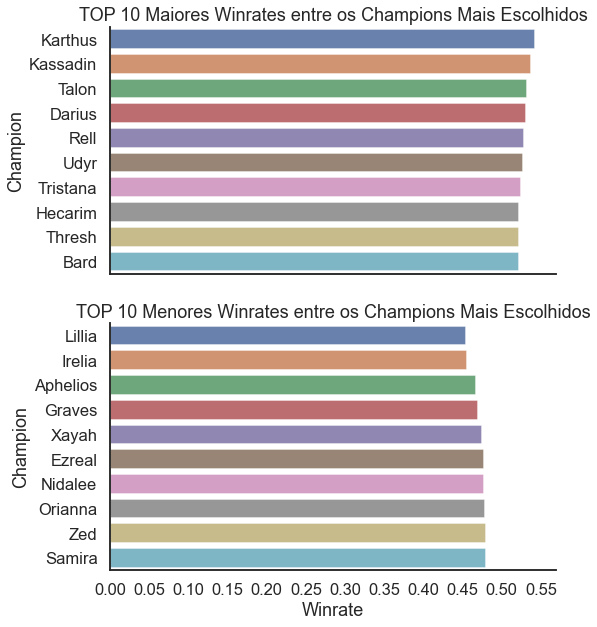

In [25]:
fig, axs = plt.subplots(2, figsize = (8,10), sharex = True)

same_kwargs = {'x': 'Winrate',
               'y': 'Champion',
               'orient': 'h',
               'alpha': 0.9}

sns.barplot(data=most_used_champions_wr.nlargest(10, 'Winrate'),
            ax=axs[0], **same_kwargs)

sns.barplot(data = most_used_champions_wr.nsmallest(10, 'Winrate'),
            ax=axs[1],  **same_kwargs)

axs[0].set(title="TOP 10 Maiores Winrates entre os Champions Mais Escolhidos",
           xticks=np.arange(0, 0.6, 0.05),
           xlabel='')

axs[1].set(title="TOP 10 Menores Winrates entre os Champions Mais Escolhidos")

axs;

Observando apenas os 10 campeões mais usados em cada role de ambos os times (no total foram 53 campeões), observamos que a **maioria possui *winrate* maior que 50%**, ainda que seja uma maioria por pouco: **24 campeões tem winrate abaixo desse valor**.
<br>

A Kai'sa, campeão com o maior pickrate da nossa amostra, possui 51,6%. Apesar de ser acima de 50%, não é nenhum valor muito absurdo e podemos definir que o campeão é relativamente balanceado.
<br>

No topo da lista, o **Karthus alcança 54,25% de frequência de vitória** dentro da nossa amostra, seguido pelo **Kassadin e o Talon**. Já os lanterninhas são a Lilia, a Irelia e o Aphelios.
<br>

Obs.: Por mais que sejam mais de 54 mil partidas ao todo, deve-se notar que são muitos campeões para dividir essas partidas também. **Um jogador MUITO bom com algum dos campeões e que esteja *smurfando* em uma divisão mais baixa com ele pode sim ter força o suficiente para alterar o winrate desse campeão** no nosso dataset, ainda que improvável. Existem pouco mais de 4mil partidas com o Karthus em algum dos times, por exemplo. 
<br>

Como não possuímos dados de farm de minions de cada jogador (eles foram somados para transformar os dados da match em apenas uma row), mas possuímos o valor do farm de minions da jungle, vamos explorar os junglers com maior farm aos 10min.

In [26]:
# Pegar o nome de todos os junglers, independente do time e cortando os repetidos utilizando transformando em set

junglers_list = set(df_modified['name_JUNGLE_red'].unique().tolist()
                    + df_modified['name_JUNGLE_blue'].unique().tolist())

jungle_farm_stats = pd.DataFrame(columns = ["Champion",
                                            "Avg JG Minions Farmed",
                                            "STD JG Minions Farmed",
                                            "Max", "Min",
                                            "Number of Times Picked"])

for champion in junglers_list:
    
    jg_farm = []
    
    for c in ['red', 'blue']:
        
        mask = df_modified[f'name_JUNGLE_{c}'] == champion
        
        jg_farm += df_modified[mask][f'jungleMinionsKilled_{c}'].tolist()
        
    jungle_farm_stats = jungle_farm_stats.append({"Champion": champion,
                                                  "Avg JG Minions Farmed": np.mean(jg_farm), 
                                                  "STD JG Minions Farmed": np.std(jg_farm),
                                                  "Max": np.max(jg_farm), "Min": np.min(jg_farm), 
                                                  "Number of Times Picked": len(jg_farm)},
                                                  ignore_index=True)

In [27]:
# Ordenando pelo farm médio

jungle_farm_stats.sort_values(["Avg JG Minions Farmed"],
                              ascending=False, inplace=True)

jungle_farm_stats.set_index('Champion')

Avg JG Minions Farmed  STD JG Minions Farmed  Max Min  \
Champion                                                          
Udyr                  66.836218               9.812299  106   0   
Urgot                 65.000000               5.131601   72  56   
Dr.Mundo              64.647002               9.851662   93  16   
Karthus               63.637363               9.677118  103   0   
Darius                62.500000               5.500000   68  57   
...                         ...                    ...  ...  ..   
Sona                  48.600000               9.687105   68  26   
Twitch                48.582677              11.105394   70   7   
Xayah                 48.333333               9.792287   71  36   
Elise                 46.406489               7.716449   76   0   
Brand                 42.461538              18.117630   66   0   

         Number of Times Picked  
Champion                         
Udyr                       4506  
Urgot                         6  
Dr.Mundo                   2085  
Karthus                    4277  
Darius                        2  
...                         ...  
Sona                         40  
Twitch                      127  
Xayah                        12  
Elise                      4839  
Brand                        13  

[150 rows x 5 columns]

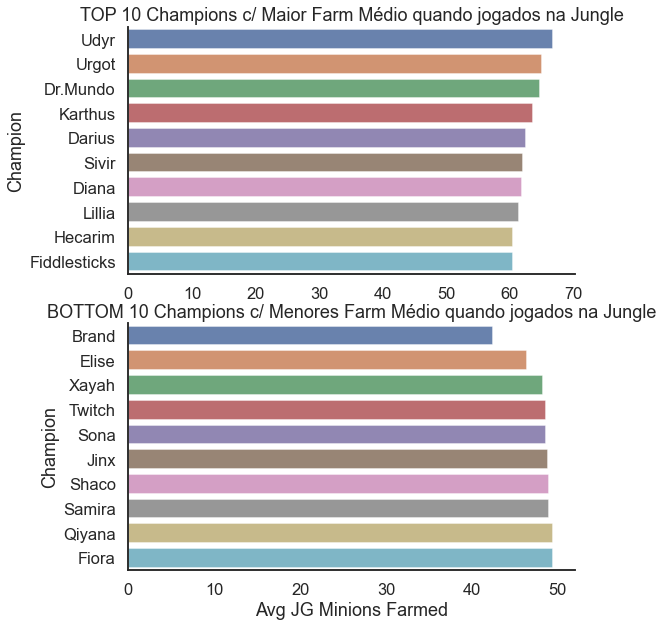

In [28]:
fig, axs = plt.subplots(2, figsize=(8,10))

same_kwargs = {'x': 'Avg JG Minions Farmed',
               'y': 'Champion',
               'orient': 'h',
               'alpha': 0.9}

sns.barplot(data=jungle_farm_stats.nlargest(10, 'Avg JG Minions Farmed'),
            ax=axs[0], **same_kwargs)

axs[0].set(title="TOP 10 Champions c/ Maior Farm Médio quando jogados na Jungle",
           xlabel='')

sns.barplot(data=jungle_farm_stats.nsmallest(10, 'Avg JG Minions Farmed'),
            ax=axs[1], **same_kwargs)

axs[1].set(title="BOTTOM 10 Champions c/ Menores Farm Médio quando jogados na Jungle")

axs;

Pra quem já está mais familiariazado com o LoL, pode ver algumas surpresas aqui! Muitos jungles completamente fora do meta dentro dos TOP Farmers nos primeiros 10 minutos e, apesar de entre os piores, os players que usaram Sona como jungle bateram o farm inicial de alguns Twitch's, Elise's e Brand's - que são **bem mais** do meta do que ela. 
<br>

Esses resultados devem ser vistos com um pouco de ceticismo, uma vez que **a API do LoL não identifica com precisão as posições dos jogadores** - o que possivelmente explica essa Sona com quase 50 de farm na Jungle?! 
<br>

No topo da lista e de forma bem esperada, está o Udyr, um jungler bem focado em fazer *full-clear*, isso é, limpar todos os campos da jungle. 

### Correlação e Scatter Plots

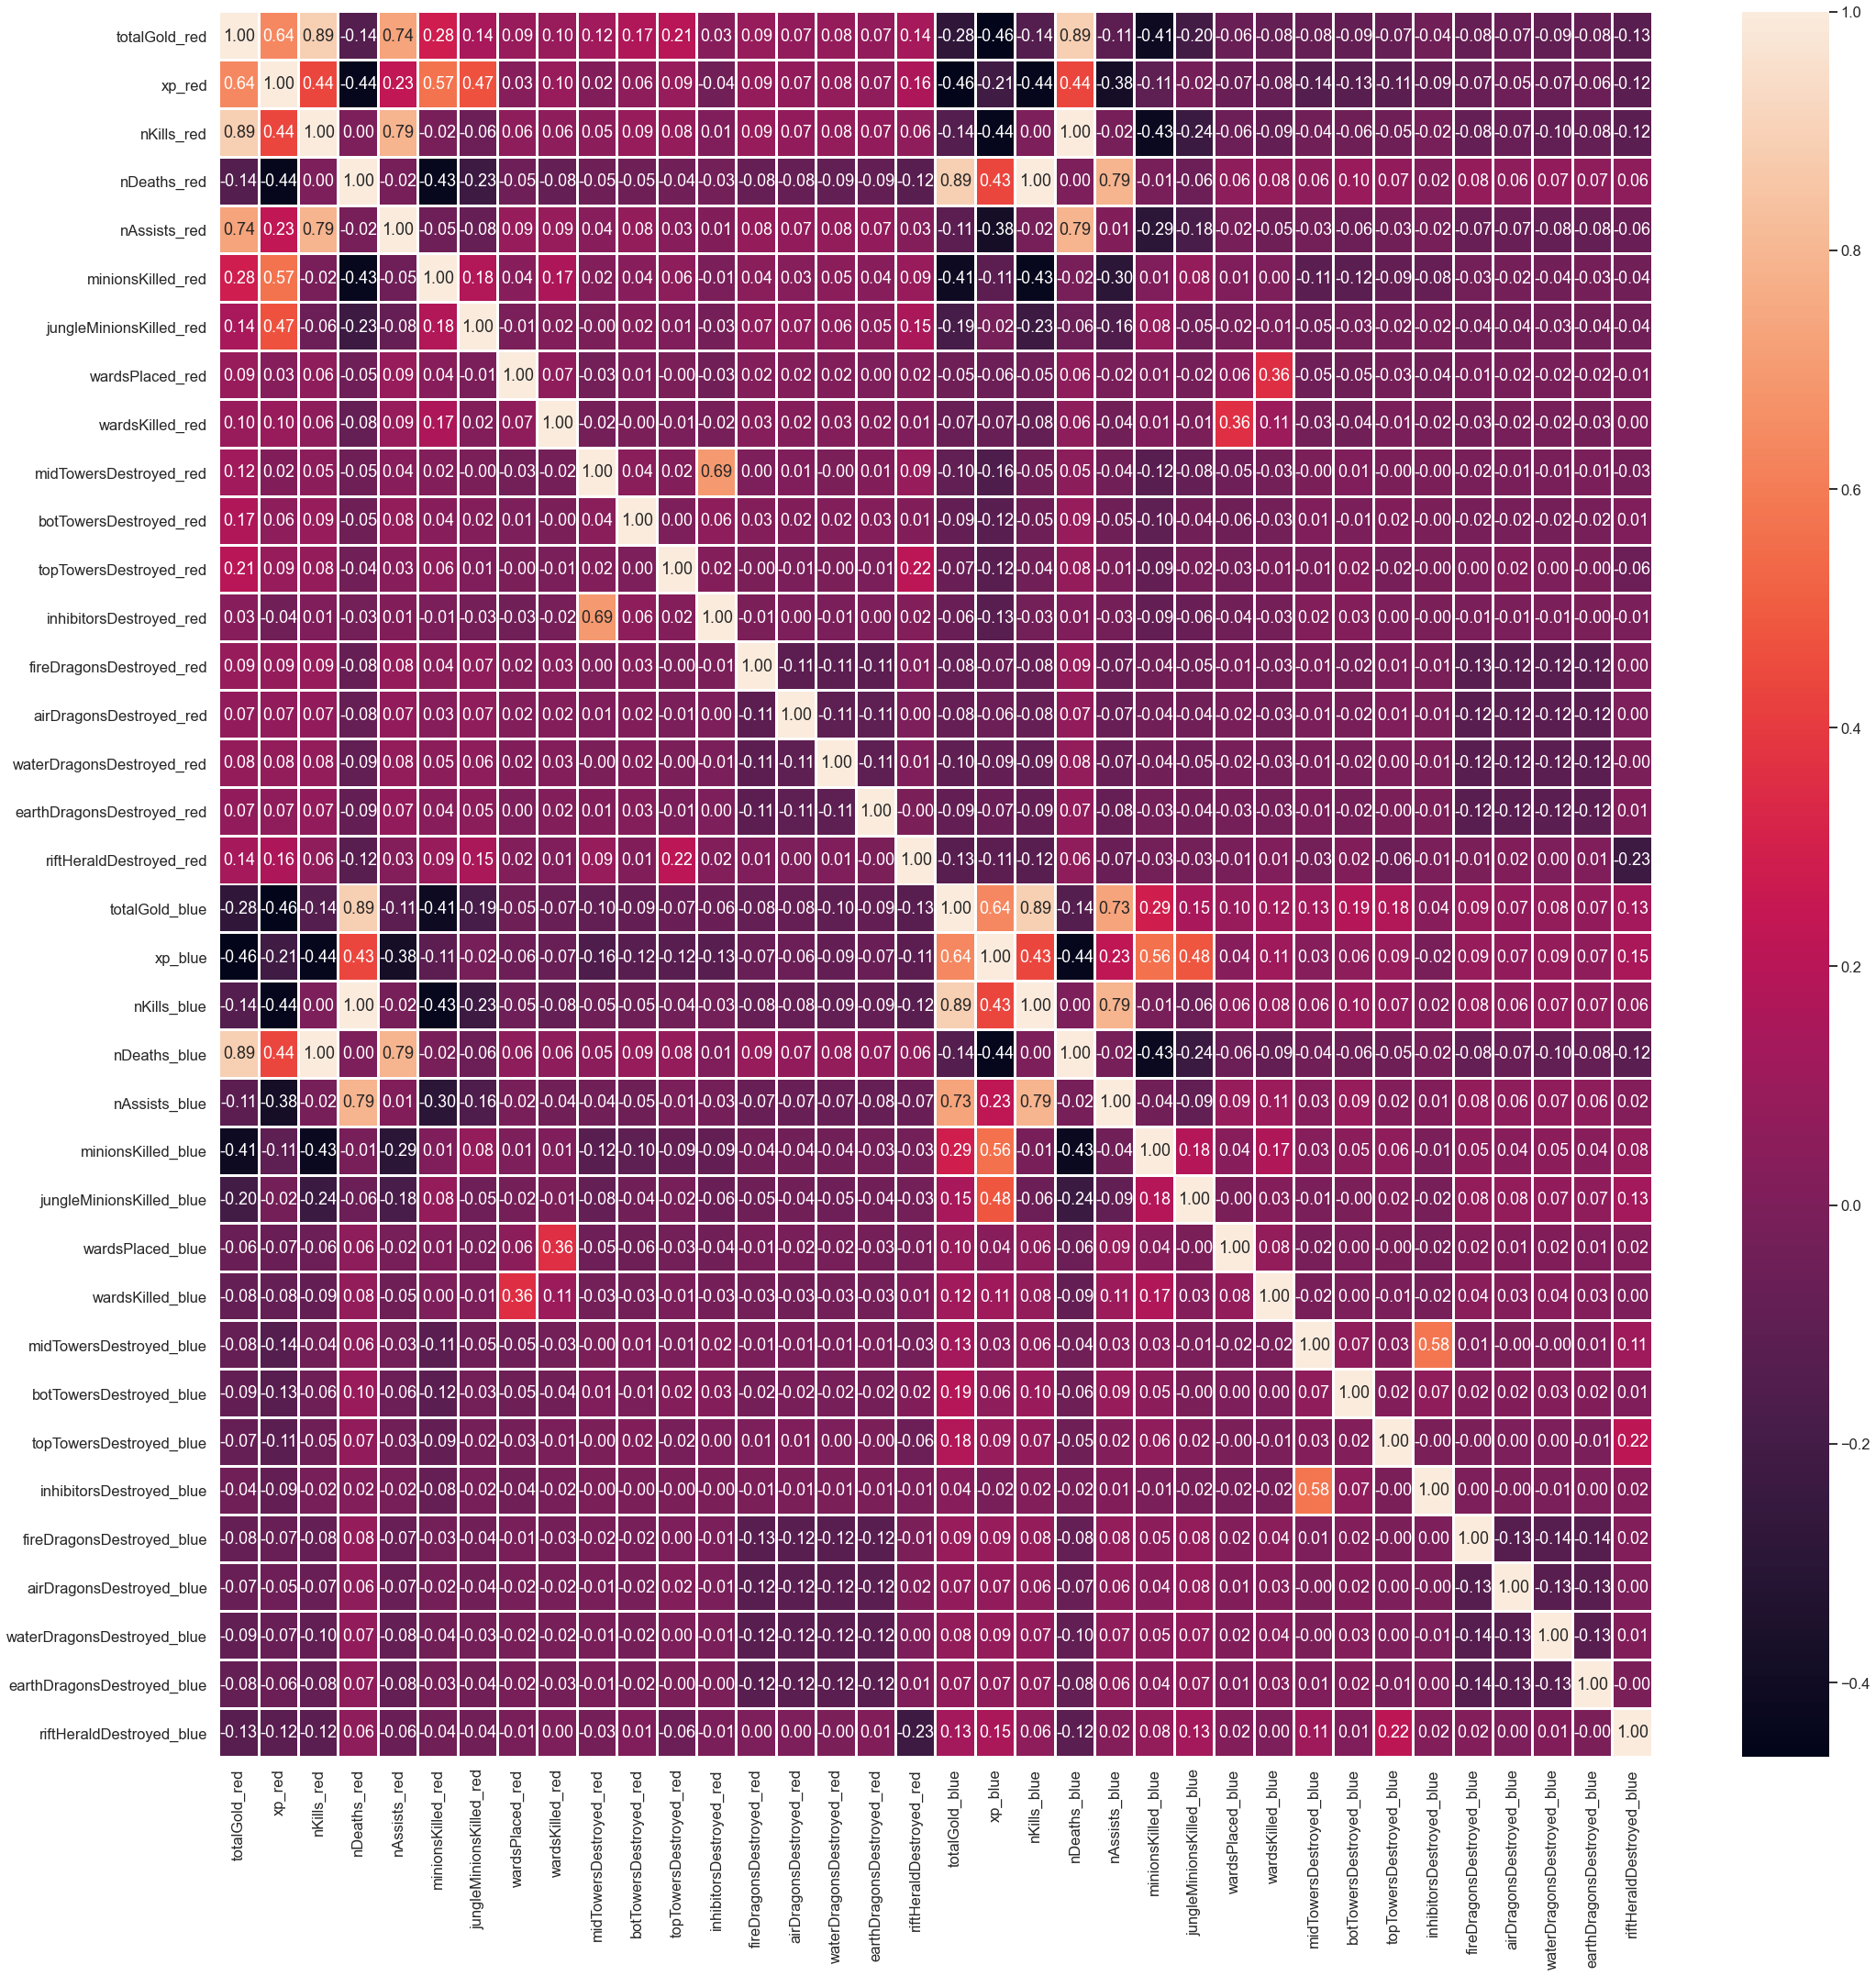

In [29]:
fig, ax = plt.subplots(figsize = (35, 35))

sns.heatmap(raw_df.corr(), annot=True, fmt='.2f', linewidths=2);

Para aqueles que já conhecem ou jogam LoL, esse heatmap não traz muitas novidades:
* XP recebido tem correlação moderada-alta com o número de kills do próprio time (e com o número de mortes do outro), minions mortos, assists e ouro recebido.
* Como o recebimento de ouro acontece através de mortes e farm de minions, eles também possuem correlação entre si.
* O número de inibidores destruidos tem correlação moderada com o número de torres destruídas no mid.
* O número de mortes do time tem correlação negativa com o XP recebido.
    * Players com o level mais baixo acabam morrendo mais.
    * Players mortos diversas vezes não farmam tanto quanto aqueles que estão vivos, recebendo menos XP.
* O número de torres destruídas do TOP por um time tem correlação com o Rift Herald ser morto pelo mesmo time.
<br>

Vamos observar algumas dessas relações utilizando scatterplots:

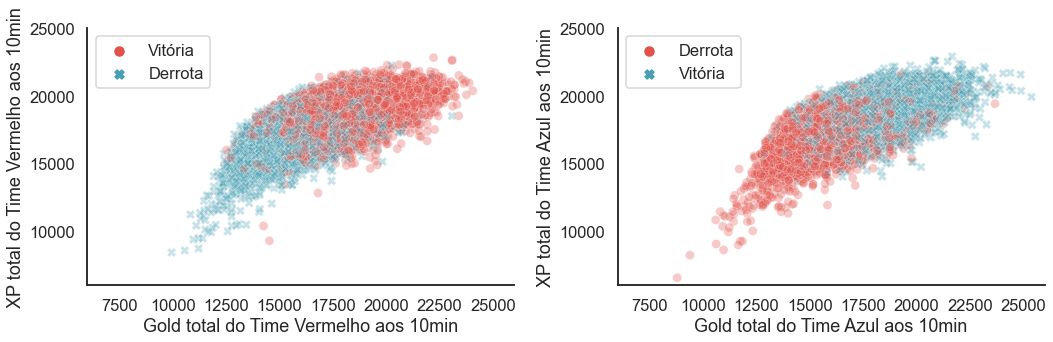

In [30]:
fig, axs = plt.subplots(1,2, figsize=(15,5))

labels = ['Vitória', 'Derrota'] 

for ax, c, color, i in zip(axs, ['red', 'blue'], ['Vermelho', 'Azul'], [1, -1]):

    sns.scatterplot(x=f"totalGold_{c}", y=f"xp_{c}",
                    hue='isWinner_blue', style='isWinner_blue',
                    data=df_modified, ax=ax,
                    palette=custom_palette,
                    alpha = 0.3);

    ax.set(title='',
           xlabel=f'Gold total do Time {color} aos 10min',
           ylabel=f'XP total do Time {color} aos 10min',
           xlim=[6000, 26000],
           ylim=[6000, 25000])

    for t, l in zip(ax.legend().get_texts(), labels[::i]): t.set_text(l)

fig.tight_layout()

Apesar de algumas exceções, podemos ver que a maior parte das vezes quem ganha é o time com maior ouro e maior XP. Além disso, podemos ver a correlação entre as duas variáveis claramente - quanto mais ouro, mais XP e vice-versa.

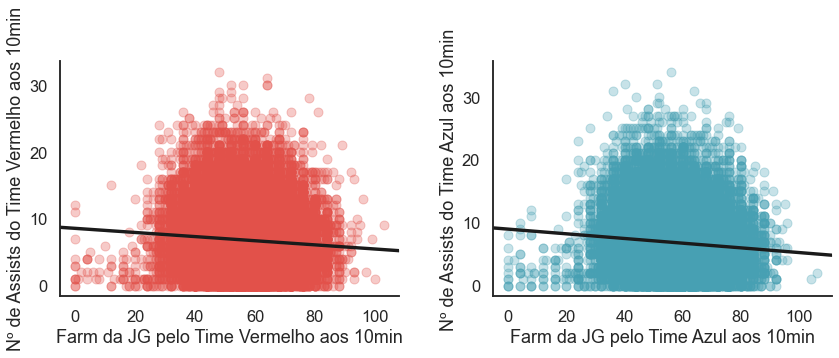

In [31]:
fig, axs = plt.subplots(1,2, figsize = (12,5))

for ax, c, color, i in zip(axs, ['red', 'blue'], ['Vermelho', 'Azul'], [0,1]):
    
    sns.regplot(y=f"nAssists_{c}",
                x=f"jungleMinionsKilled_{c}",
                data=df_modified, ax=ax,
                truncate=False, line_kws={'color': 'k'},
                scatter_kws = {'alpha': 0.3, 'color': custom_palette[i]})

    ax.set(title='',
           ylabel=f'Nº de Assists do Time {color} aos 10min',
           xlabel=f'Farm da JG pelo Time {color} aos 10min')

fig.tight_layout()

Esse é menos óbvio que o primeiro plot, mas pode ser esperado: times que possuem um menor número de minions da jungle farmados tendem a ter maior número de assistências. 

Apesar de não ser possível comprovar a causalidade do número de minions farmados sobre o número de assists, é possível imaginar que um jungler que realiza full-clear (farma todos os minions da jungle continuamente) tem menos tempo para dar assistência aos seus colegas de equipe! 

### Objetivos

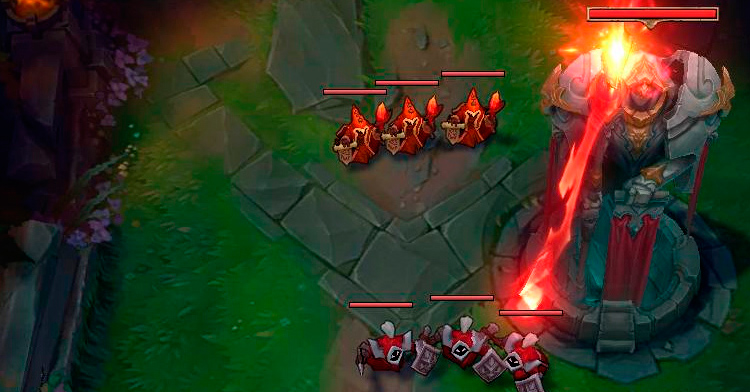
<br>

No League of Legends, o objetivo principal é destruir o Nexus inimigo. Para isso, são necessárias destruir as torres que protegem o caminho até a base do oponente. 

Além disso, existem também os **objetivos globais**, que são aqueles que oferecem benefícios para qualquer uma das equipes que conquista-los - são eles os **Dragões Elementais, o Rift Herald, o Dragão Ancião, e o Baron Nashor**. No entanto, os últimos dois surgem em estágios mais avançados da partida, que não são contemplados nesse dataset.

In [32]:
df_towers = pd.DataFrame()

# Somar o número de Torres p/ lane independente de time

for lane in ['mid', 'top', 'bot']:
    df_towers.loc[:, lane] = (df_modified[f'{lane}TowersDestroyed_red'] 
                              + df_modified[f'{lane}TowersDestroyed_blue'])

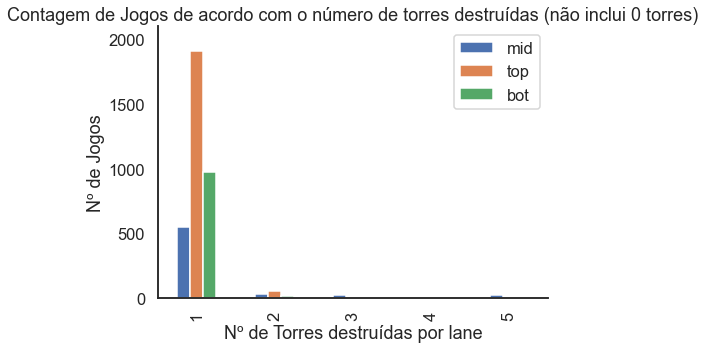

In [33]:
fig, ax = plt.subplots(figsize=(7,5))

# Retirar NaNs e Jogos c/ número de torres destruídas = 0

df_towers.apply(pd.Series.value_counts) \
                         .fillna(0) \
                         .drop(0, axis=0) \
                         .plot(kind='bar', ax=ax);

ax.set(title='Contagem de Jogos de acordo com o número de torres destruídas (não inclui 0 torres)',
       ylabel='Nº de Jogos',
       xlabel='Nº de Torres destruídas por lane',
       ylim =(0, 2100))

ax;

Devido ao desbalanceamento do número de jogos sem torres destruídas até os 10min, excluí eles da visualização. **A torre mais destruída** nas partidas da amostra **é a primeira torre do TOP, seguida pela do BOT e do MID**. Também é possível ver que são **pouquíssimos os jogos em que mais de uma torre é destruída** em qualquer que seja a lane até os 10min de jogo.
<br>

Vamos dar uma olhada nas eliminações dos dragões no jogo:

In [34]:
def get_drag_red(row):
    for col in df_modified.columns[17:21]:
        if row[col] == 1:
            return col.replace('DragonsDestroyed_red', '')
        
def get_drag_blue(row):
    for col in df_modified.columns[42:46]:
        if row[col] == 1:
            return col.replace('DragonsDestroyed_blue', '')
        
df_modified.loc[:, 'typeDragon_red'] = df_modified.apply(get_drag_red, axis = 1)
df_modified.loc[:, 'typeDragon_blue'] = df_modified.apply(get_drag_blue, axis = 1)

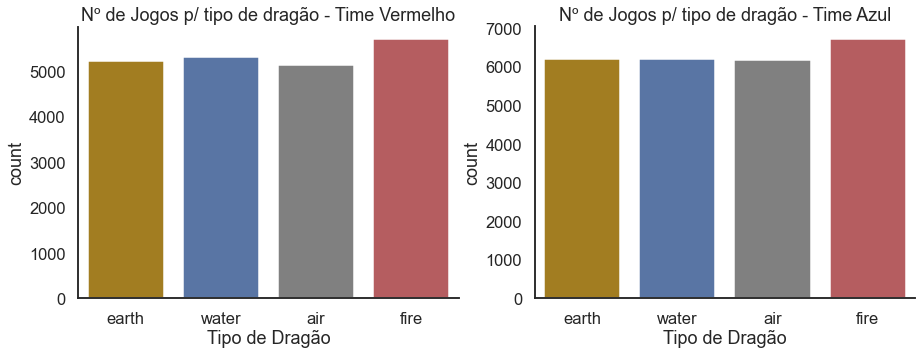

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))

for ax, c, color in zip(axs, ['red', 'blue'], ['Vermelho', 'Azul']):
    
    sns.countplot(data=df_modified, x=f'typeDragon_{c}',
                  ax=ax, palette=['darkgoldenrod','b', 'grey', 'r'],
                  order=['earth', 'water', 'air', 'fire'])

    ax.set(title=f'Nº de Jogos p/ tipo de dragão - Time {color}',
           xlabel='Tipo de Dragão')

    ax;

Para aqueles mais ligados no jogo, o resultado é até esperado. Apesar de depender um pouco de cada partida, pode-se dizer que o dragão de fogo é o que dá o buff mais forte, seguido pelo de água e o da terra - o que explica a priorização do dragão caso ele for o vermelho. Além disso, o dragão de vento é o que causa mais dano, o que dificulta a eliminação dele.

Vamos ver se a priorização dos junglers para o dragão vermelho realmente é válida e descobrir se a porcentagem de vitórias dos times que levaram o primeiro dragão de fogo é maior do que a dos outros dragões:

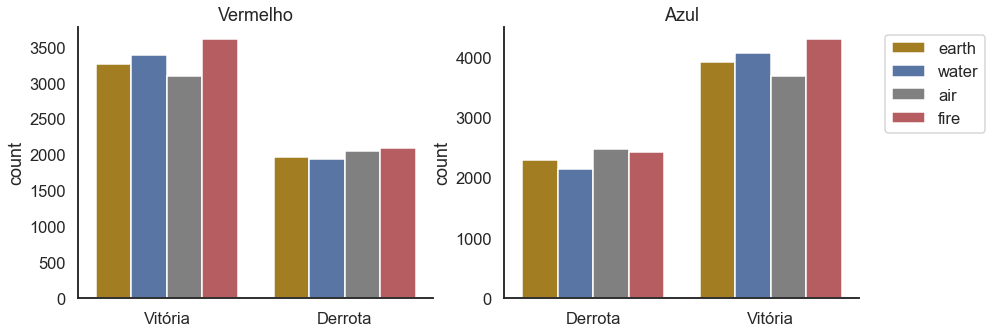

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

for ax, c, color in zip(axs, ['red', 'blue'], ['Vermelho', 'Azul']):

    sns.countplot(data=df_modified,
                  x='isWinner_blue',
                  hue=f'typeDragon_{c}',
                  palette=['darkgoldenrod', 'b', 'grey', 'r'],
                  hue_order=['earth', 'water', 'air', 'fire'],
                  ax=ax)

    ax.set(title=color,
           xlabel='',
           xticklabels=['Vitória', 'Derrota'] if c == 'red' else ['Derrota', 'Vitória'])

axs[0].get_legend().remove()
axs[1].legend(bbox_to_anchor=(1.05, 1), loc=2)

axs;

Independente do elemento, time que faz o primeiro dragão tem maior probabilidade de vitória - mas o dragão de fogo realmente é o que garante maior número de vitórias! Vamos normalizar e verificar se em porcentagem o dragão de fogo continua o primeiro buff mais forte:

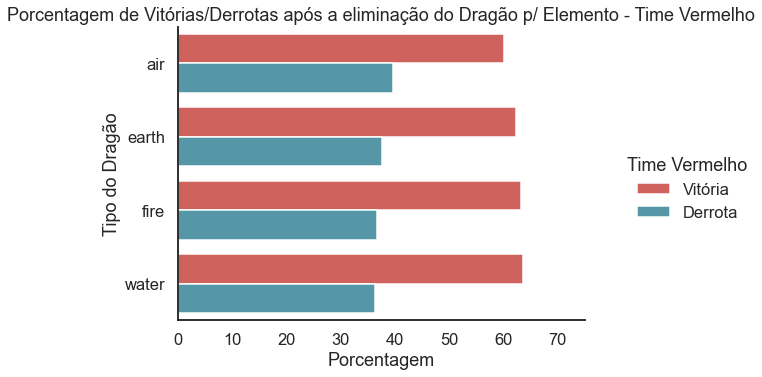

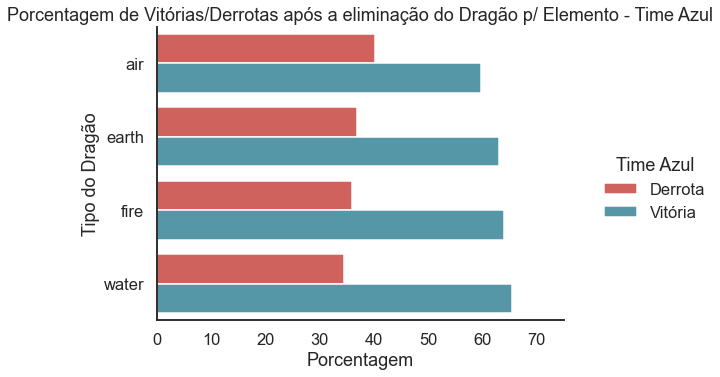

In [37]:
catplot_kwargs = {'hue': 'isWinner_blue',
                  'x': 'percent',
                  'kind': 'bar',
                  'palette': custom_palette,
                  'legend_out': True,
                  'height': 5,
                  'aspect': 1.4}

for c, color in zip(['red', 'blue'], ['Vermelho', 'Azul']):

    df = df_modified.groupby(f'typeDragon_{c}')['isWinner_blue'] \
                    .value_counts(normalize=True).mul(100) \
                    .rename('percent').reset_index()

    g = sns.catplot(y=f'typeDragon_{c}',
                    data=df,
                    **catplot_kwargs)

    g.ax.set(title=f'Porcentagem de Vitórias/Derrotas após a eliminação do Dragão p/ Elemento - Time {color}',
             xlabel='Porcentagem',
             xlim=(0, 75),
             ylabel='Tipo do Dragão')

    g._legend.set_title(f'Time {color}')
    new_labels = ['Vitória', 'Derrota'] if c == 'red' else [ 'Derrota', 'Vitória']
    for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

    g;

Apesar do primeiro dragão de fogo ainda oferecer uma porcentagem maior de vitória do que o da terra e do ar, o **dragão da água é o que tem a maior**, em ambos os times - alcançando aproximadamente 66% de Winrate no time azul. 
<br>

Pode-se perceber a importância do dragão como feature para previsão do time vencedor nos jogos em que o dragão é eliminado nos primeiros 10min. É importante notar também que, dependendo da partida, o time que conseguiu controle do dragão logo no início já está mais forte que o outro (e a morte do dragão foi mais uma consequência dessa força), o que pode tirar a causalidade do dragão. 

### Visão

O League of Legends possui um sistema de "névoa de guerra" sobre o mapa, que impossibilita ver o que está acontecendo em lugares distantes do seu personagem, há menos que no lugar esteja um aliado ou uma **ward**, também chamada de sentinela na versão PT-BR do jogo. As wards são itens invísiveis que podem ser colocados em qualquer lugar do mapa, garantindo visão na área em volta dela.

Wardar lugares importantes do mapa (como o pit que fica o dragão, por exemplo) é importante para que o time tenha controle dos objetivos, saiba onde seus inimigos estão e jogue de acordo com essas informações. É sábido que há muita diferença entre as habilidades de warding entre jogadores de divisões diferentes - mas será que elas fazem tanta diferença assim num nível mais alto? Ou será que como todos possuem habilidades parecidas sobre como wardar, elas não fazem tanta diferença assim?

No dataset, temos duas variáveis para cada time relacionadas a ward: wards colocadas e wards eliminadas

In [38]:
df_modified[['wardsPlaced_red', 'wardsKilled_red', 'wardsPlaced_blue', 'wardsKilled_blue']].describe()

wardsPlaced_red  wardsKilled_red  wardsPlaced_blue  wardsKilled_blue
count     54120.000000     54120.000000      54120.000000      54120.000000
mean         15.282354         2.737731         15.281874          2.606098
std           2.686047         1.671011          2.689074          1.658243
min           4.000000         0.000000          2.000000          0.000000
25%          14.000000         2.000000         14.000000          1.000000
50%          15.000000         3.000000         15.000000          2.000000
75%          17.000000         4.000000         17.000000          4.000000
max          32.000000        11.000000         32.000000         12.000000

Através do describe observamos que o uso e a eliminação de wards entre os dois times é parecida - isso é esperado considerando todas as investigações relativas à indiferença entre o time azul e o vermelho que fizemos. Algo que me chamou atenção foi a alta dispersão nas Wards Eliminadas - tanto o IQR quanto o STD são mais da metade da média.  

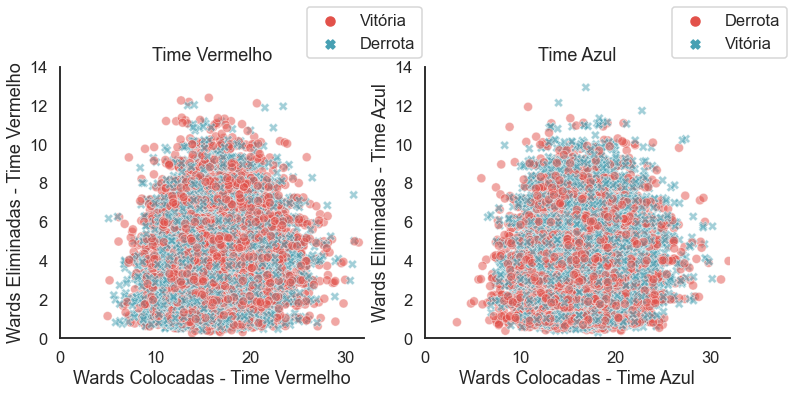

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

for ax, color, C, labels in zip(axs, ['red', 'blue'], ['Vermelho', 'Azul'],
                             [['Vitória', 'Derrota', ''], ['Derrota', 'Vitória', '']]):

    # Jitter adicionado pq são variáveis discretas
    
    x = df_modified[f'wardsPlaced_{color}'] + np.random.normal(1, 0.3, size=len(df_modified))
    y = df_modified[f'wardsKilled_{color}'] + np.random.normal(1, 0.2, size=len(df_modified))

    sns.scatterplot(x=x, y=y, data=df_modified,
                    hue='isWinner_blue', alpha=0.5,
                    palette=custom_palette, ax=ax,
                    style='isWinner_blue')

    ax.set(xlim=(0, 32),
           ylim=(0, 14),
           title=f'Time {C}',
           ylabel=f'Wards Eliminadas - Time {C}',
           xlabel=f'Wards Colocadas - Time {C}')

    legend = ax.legend(bbox_to_anchor=(1, 1), loc=8)

    for t, l in zip(legend.get_texts(), labels): t.set_text(l)

axs;

Apesar da divisão das cores não ser tão expressiva quanto ao plot do XP x Gold, dá pra sim que o cantos de cada uma das figuras estão de acordo:

* Quanto mais Wards Eliminadas e Wards Colocadas por um time, maior a probabilidade daquele time ter ganhado
* O contrário também é válido - quanto menor o número de wards, maior a chance de derrota

## Conclusão



Apesar do dataset não ter todas as informações do jogo, já foi possível observar a importância de algumas features para a decisão da vitória. Além disso, descobrimos algumas curiosidades sobre a amostra em relação aos campeões utilizados, o winrate de cada um dos dragões elementais e a preferência dos junglers pelo dragão d'água. 
<br>

Para aqueles mais familiarizados com o jogo, conseguimos provar com dados alguns conhecimentos de senso comum como a correlação entre o farm da jungle e o número de assists, a famosa fala "visão ganha jogo" e confirmamos o winrate elevado de certos campeões.
<br>

Com um dataset mais completo - contendo todas as informações da partida disponibilizados pela API da Riot - daria para realizar um EDA ainda mais complexo! No entanto, como dito anteriormente, esse dataset foi criado com informações que julguei necessárias para criar um modelo de Machine Learning que o time vencedor e, com a análise, confirmo que é possível.